# Classifying Data with Decision Trees 
In this notebook, you'll learn how to use decision trees for the classification of datasets. Simply put: If we look at an individual, we want to know, to which group/class it belongs. Contrary to *clustering*, we know the different kinds of classes!

## Goals
- Prepare our dataset and split it into a training and a test dataset
- Train a decision tree
- Use our model to predict the class/group of an individual
- Visualize our model

## Supervised Learning with Decision Trees

### Supervised Learning 

**Starting point**
* Outcome measurement $𝑦$ (also called dependent variable, response, target).
* Vector of 𝑝 predictor measurements $𝑋$ (also called inputs, regressors, covariates, features, independent variables). 
* Labeled training data – i.e., known input/output combinations $(𝑥_1, 𝑦_1), . . . , (𝑥_𝑁, 𝑦_𝑁)$. 

**On the basis of the training data we would like to**
* Accurately predict unseen test cases.
* Understand which inputs affect the outcome, and how.
* Assess the quality of our predictions and inferences.

**Variants / examples**
* In the regression problem, $𝑦$ is quantitative / a number (e.g. price of a product, patient’s blood pressure, …).
* In the classification problem, $𝑦$ takes values in a finite, unordered set / is a label (e.g. survived/died, digits 0-9, cancer class of tissue sample, …).


## Classification in Practice

As always, we'll start off with our imports. By now, you should know how to import pandas, numpy, and seaborn and what abbreviations to use.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In this notebook, we need a few new tools from sci-kit learn. You'll get to know them later, for now, just import them.

In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Import the `penguins` dataset. Remember: you could use a csv-file or you can use the convenience function provided by seaborn to load the dataset. For now, stick with `seaborn`'s function.

In [4]:
penguins = sns.load_dataset("penguins")
penguins.dropna(inplace=True)

Let's have a quick look at the data. As we've already seen, seaborn's pairplot is a great tool for an initial glance at the data. Remember: specify in `hue=` which column seaborn should use do indicate separate groups within your dataset. This makes your figure much more readable!

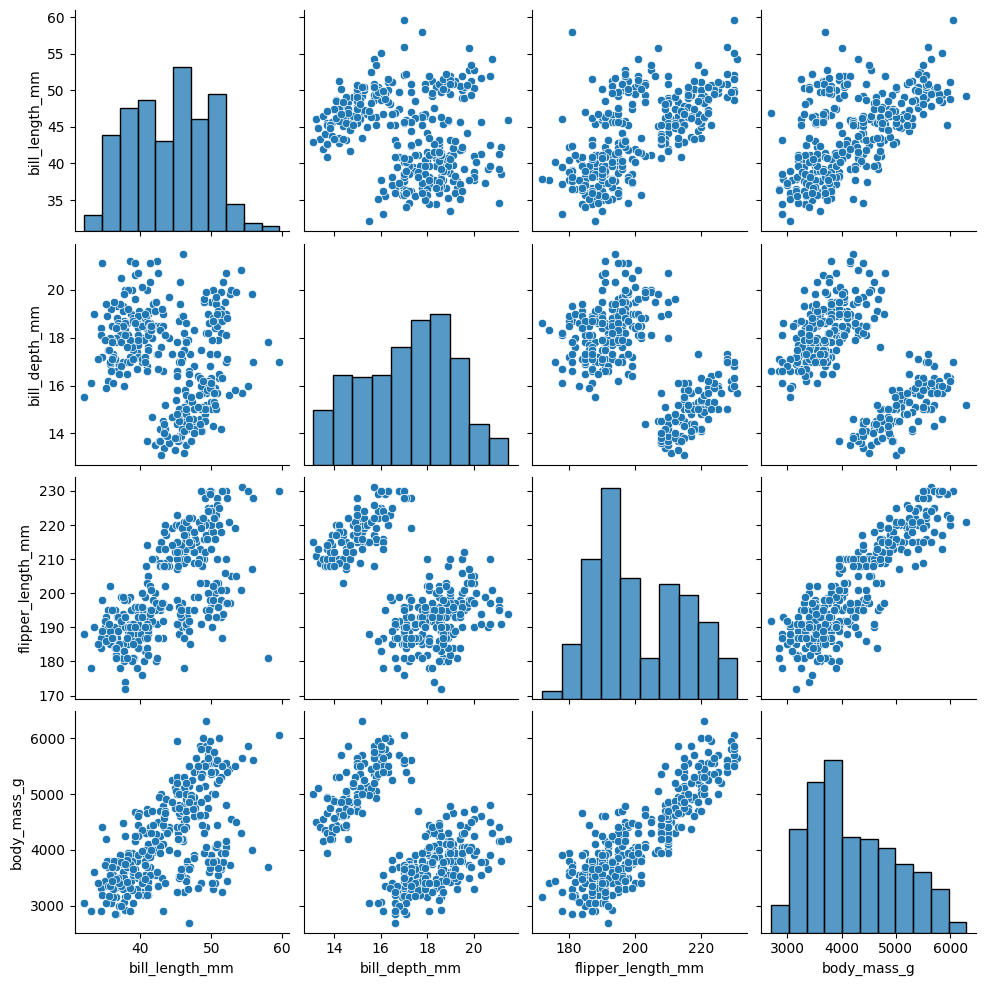

In [5]:
sns.pairplot(data=penguins)

We've seen the figure above numerous times. You've probably got a good feeling for it by now. 

Which parameters do you think are needed to correctly classify an individual penguin? 

We propose that the penguins' body mass, bill length and depth, as well as the flipper length are sufficient parameters to assign a specific penguin to a group!

## Training our model

We'll have to train a model (as we've done before). To do so, we compose a variable $X$ (a `DataFrame` containing the above properties) and $y$ (a Series, containing the species).

*Attention:* Double square brackets produce a DataFrame (`[[...]]`), whereas single square brackets create a Series (`[...]`). We have seen this before when training a model!

In [6]:
X = penguins[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
y = penguins['species']

*Question*: Is this a supervised or unsupervised method? Why? What do $X$ and $y$ represent?

### Splitting our dataset into two parts

We want to be sure that our model does work for our specific use case. Therefore, we'd like to split our data into a part for training and a part for testing our model. We could do that manually ... -- or use a function provided by `scikit learn`.

---
### &#x270d; Exercise 

Have a look at the documentation of the `train_test_split`-function!

Carefully read the documentation and try to understand what is going on here. What is the standard ratio/proportion of the test sample?

Then, split both $X$ and $y$ (at the same time) into a dataset for training and testing! (*Hint: You can see how this is done in the documentation*.)

Please use the following variable names: `X_train, y_train` fand `X_test, y_test`.

In [8]:
# YOUR CODE HERE
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

---

Let's have a quick look at the original $X$ and $y$ objects as well as at the results!

In [15]:
X

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm
0,3750.0,39.1,18.7,181.0
1,3800.0,39.5,17.4,186.0
2,3250.0,40.3,18.0,195.0
4,3450.0,36.7,19.3,193.0
5,3650.0,39.3,20.6,190.0
...,...,...,...,...
338,4925.0,47.2,13.7,214.0
340,4850.0,46.8,14.3,215.0
341,5750.0,50.4,15.7,222.0
342,5200.0,45.2,14.8,212.0


In [16]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [17]:
X_train

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm
173,3400.0,48.5,17.5,191.0
255,5400.0,48.4,16.3,220.0
124,3050.0,35.2,15.9,186.0
256,4950.0,42.6,13.7,213.0
307,5300.0,51.3,14.2,218.0
...,...,...,...,...
90,3550.0,35.7,18.0,202.0
327,5500.0,53.4,15.8,219.0
134,3425.0,38.1,17.6,187.0
44,3000.0,37.0,16.9,185.0


In [18]:
X_test

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm
154,3650.0,51.3,19.2,193.0
172,3600.0,42.4,17.3,181.0
75,4250.0,42.8,18.5,195.0
50,3500.0,39.6,17.7,186.0
63,4050.0,41.1,18.2,192.0
...,...,...,...,...
332,4650.0,43.5,15.2,213.0
120,3150.0,36.2,17.2,187.0
191,4500.0,53.5,19.9,205.0
17,4500.0,42.5,20.7,197.0


In [19]:
y_train

173    Chinstrap
255       Gentoo
124       Adelie
256       Gentoo
307       Gentoo
         ...    
90        Adelie
327       Gentoo
134       Adelie
44        Adelie
15        Adelie
Name: species, Length: 249, dtype: object

In [20]:
y_test

154    Chinstrap
172    Chinstrap
75        Adelie
50        Adelie
63        Adelie
         ...    
332       Gentoo
120       Adelie
191    Chinstrap
17        Adelie
245       Gentoo
Name: species, Length: 84, dtype: object

As you can see, the function split the original data into two parts and shuffled them. Conveniently, the relationship between an input value $X_i$ and its counterpart $y_i$ is remaining intact! In other words: the first elements of $X_{train}$ and $y_{train}$ have the same index and so on.

Note: the function randomly splits the data! If you run it multiple times (or on different devices) you get different results! If you want to achieve the same result every time, you need to pass the `random_state` parameter to the function, e.g. `random_state=1`. 

Now let's create our Decision Tree Classifier. First have a look at its documentation, then create it!

In [21]:
tree.DecisionTreeClassifier?

Init signature:
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default

As you can see, there are a lot of options. Luckily, we can just keep the defaults for our use case.

In [22]:
model = tree.DecisionTreeClassifier()

Now it's time to train the Decision Tree Classifier with our training data. As before: first, have a look at the documentation, then fit the model to the data.

In [23]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

Now we'll use the model to predict the species. In other words: We provide the model with the data (body mass, different lengths) and expect a species as result. Let's try this.

In [24]:
model.predict(X_test)

array(['Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo'

How good was the prediction? Let's check this! Store the result in a variable.

In [25]:
prediction = model.predict(X_test)
prediction

array(['Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo'

Now, we'll create a `DataFrame` and check for each element, whether the predicted value equals the correct (true) value.

In [26]:
accuracy_df = pd.DataFrame(prediction == y_test)
accuracy_df

,species
154,True
172,True
75,True
50,True
63,True
...,...
332,True
120,True
191,True
17,True


Now, let's filter for "False" which means that prediction and true value are NOT equal. In other words: This is a false prediction!

In [27]:
accuracy_df[accuracy_df['species']==False]

,species
19,False


As this is a quite tedious task, (of course) there is a convenience function to check which proportion was predicted correctly. Check out our classifier's score method (`model.score`)!

In [28]:
model.score?

Signature: model.score(X, y, sample_weight=None)
Docstring:
Return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy
which is a harsh metric since you require for each sample that
each label set be correctly predicted.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True labels for `X`.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

Returns
-------
score : float
    Mean accuracy of ``self.predict(X)`` w.r.t. `y`.
File:      c:\users\kglock\desktop\jupyter\2023-10_hector_big_data_methods_final_notebooks\env\lib\site-packages\sklearn\base.py
Type:      method

OK, let's check this for our test data!

In [29]:
model.score(X_test, y_test)

0.9880952380952381

Depending on the (random) split, you should usually see a score better than 90%, meaning that "almost all" penguins of the test set were classified correctly. But what if we were just lucky? Maybe we should redo all of the above and test again? Well, there's a convenience function for this as well! Check out `cross_val_score`!

In [30]:
cross_val_score?

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

    .

This function takes our classifier, input data ($X$) and the data we'd like to predict ($y$) -- and does the above five times! It'll return the scores of all five runs to give us a feeling how well our approach performs.

In [31]:
scores = cross_val_score(model, X, y)
scores

array([0.97014925, 0.98507463, 0.92537313, 0.96969697, 0.92424242])

Usually, you should see score values of 0.9 or better, meaning that for 5 different (random) runs, our classifier performed quite well.

In [32]:
scores.mean(), scores.var()

(np.float64(0.9549072817729535), np.float64(0.0006347441281320058))

We can expect that approximately 95% of indiviuals are classified correctly!

### Visualising our model
How does the decision tree work? One advantage of decision trees is that you can plot them in order to understand how they 'decide' to which class an individual belongs.

To analyze the decision tree visually, try the following command!

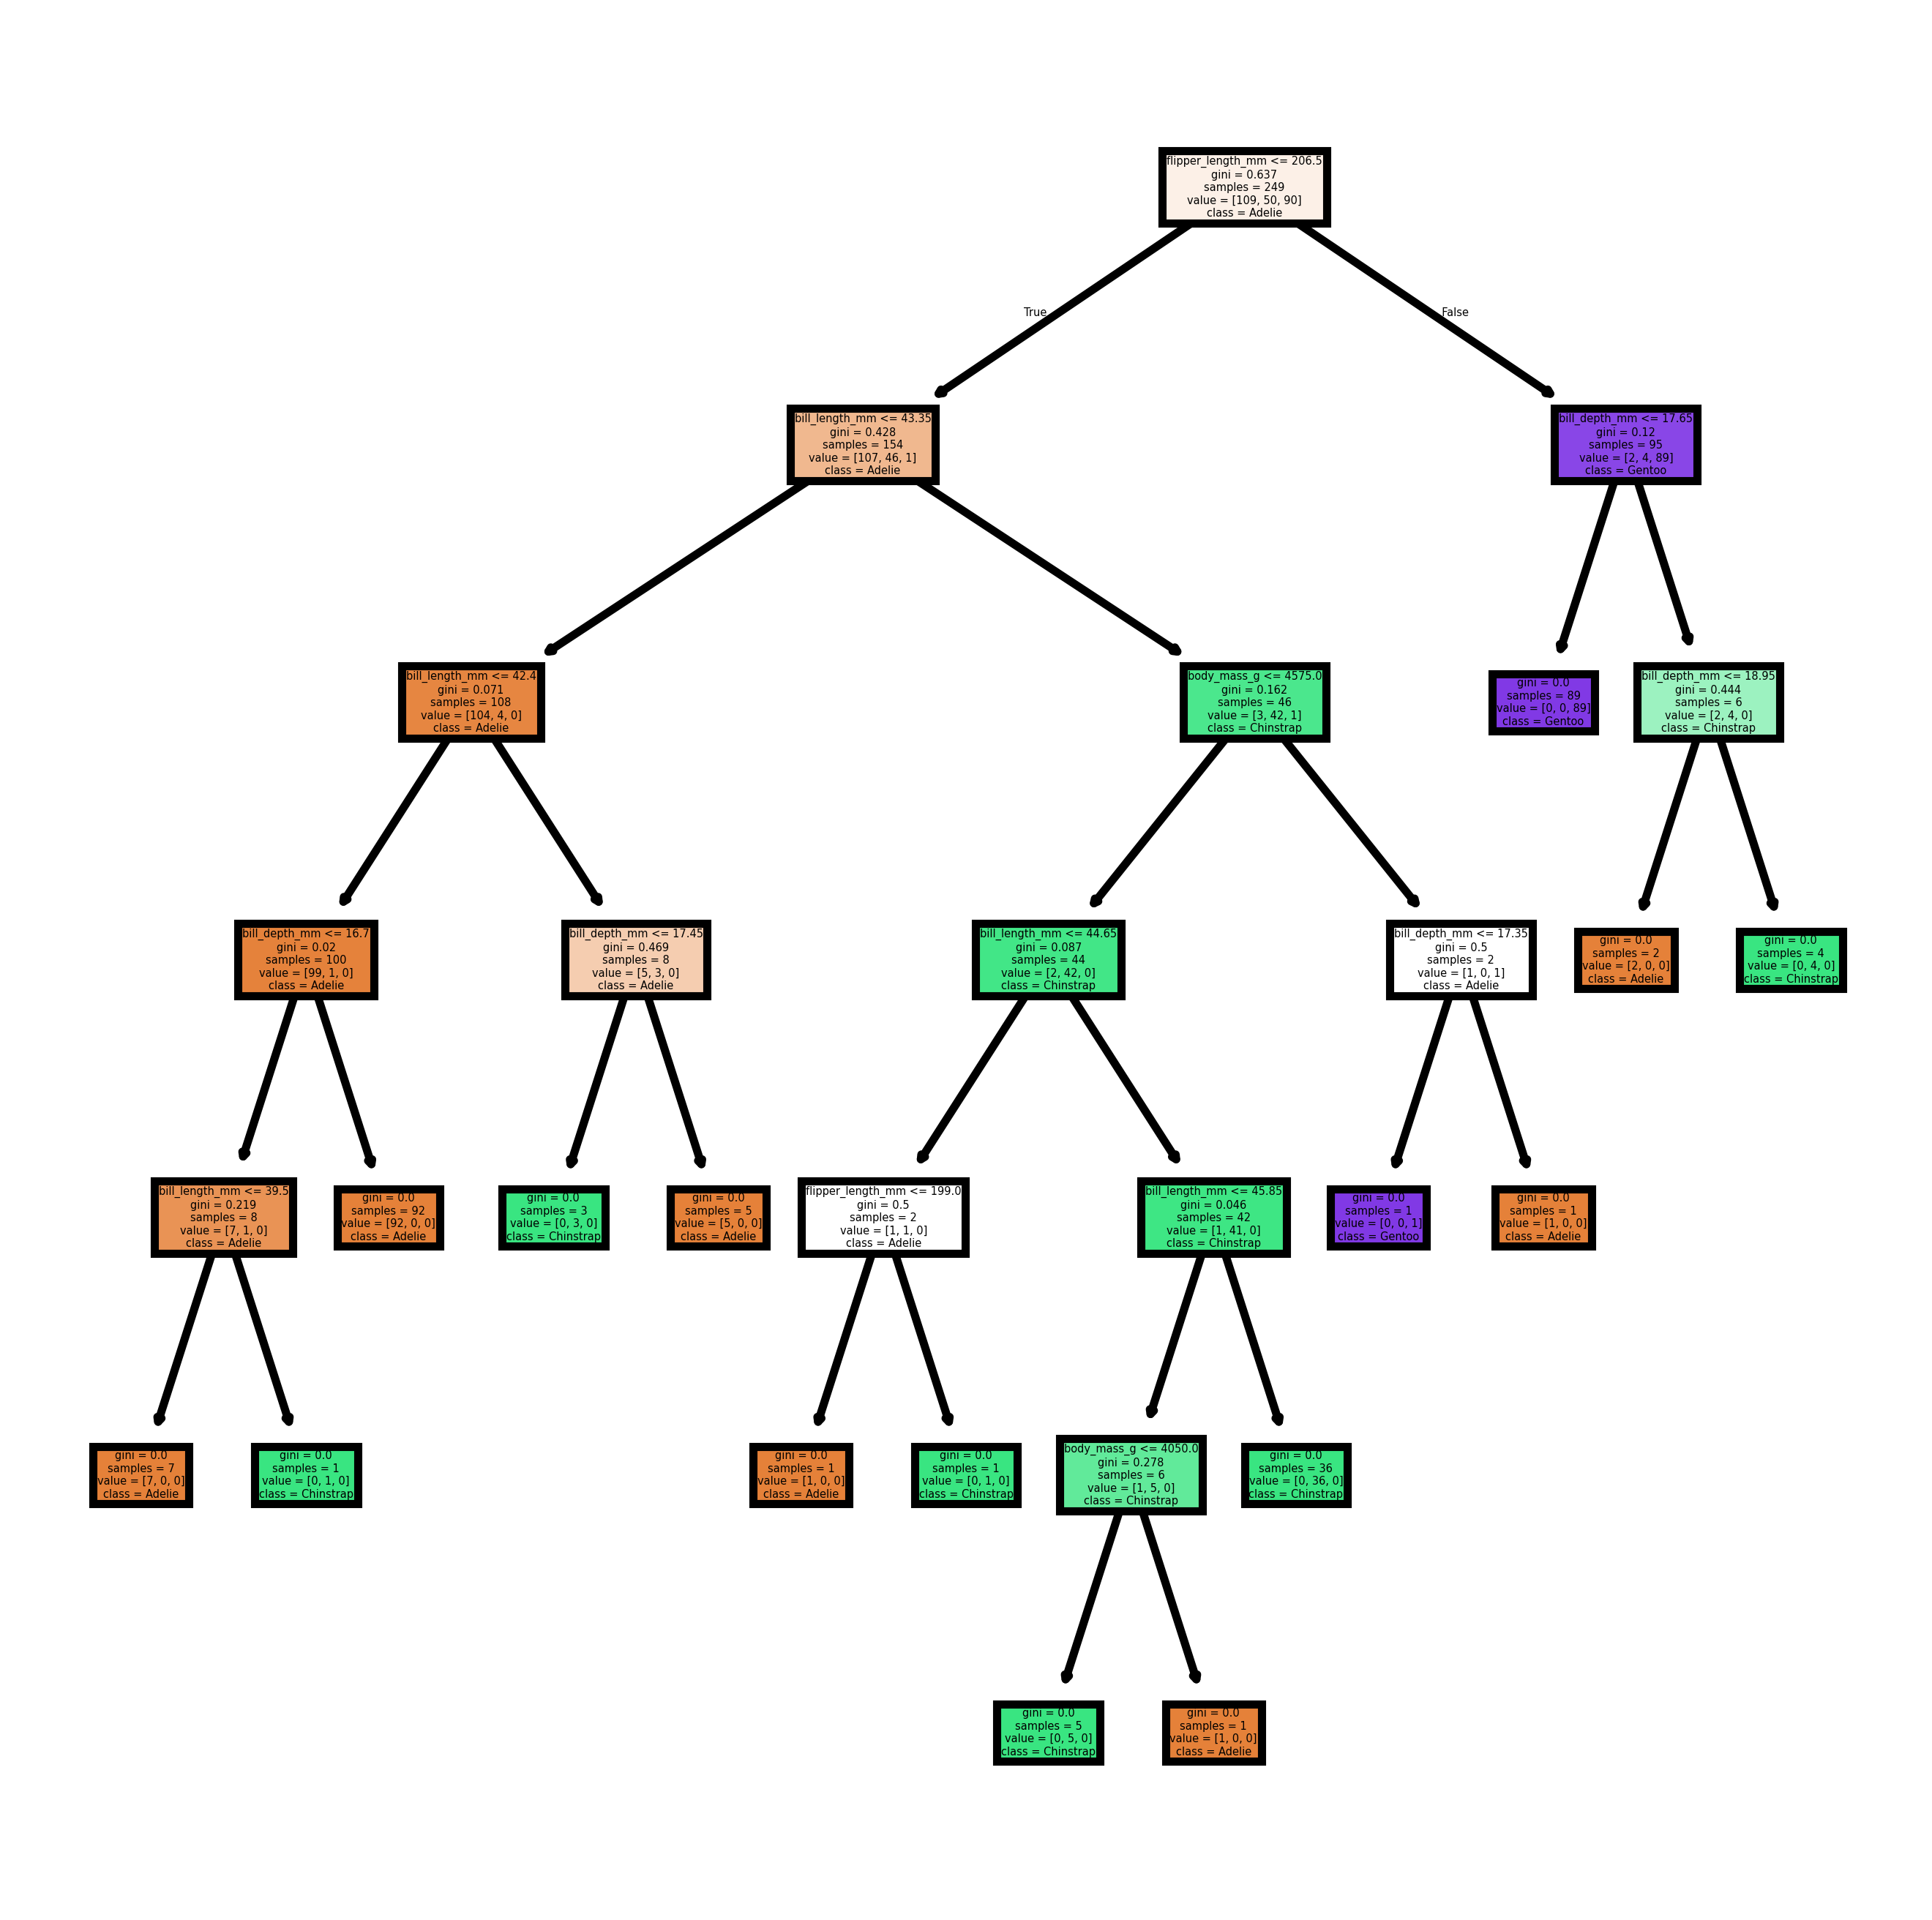

In [33]:
# we need another library to plot the tree (seaborn can't do that)
import matplotlib.pyplot as plt
# this creates a new 'canvas' on which we draw our tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# now call the plot_tree method and provide it with some parameters (most importantly, our model)
tree.plot_tree(model,
               feature_names = list(X.columns), 
               class_names=list(y.unique()),
               filled = True);
# store the tree on disk (it might not be readable below)
fig.savefig('decision_tree.png')

Compare this with the pairplot above. What do you see? Try making sense of the tree! What is your interpretation?

Hints:
- The color indicates the class/group. A more solid color means that the model is 'confident' that the class is correct, a lighter color means that the model is 'unsure' whether the class is correct (the so called impurity).
- 'value' corresponds to the number of individuals
- 'gini' corresponds to https://en.wikipedia.org/wiki/Gini_coefficient

Does our model seem sensible?

### Summary
In this section, we've created a decision tree which is a model for the classification of individuals.

Before, we used a clustering model to *create different clusters* from unlabelled data, now we trained a model (using labelled data), to *decide to wich class an indivdual belongs*. 

## Finale: Random Forest

As you can see, a random tree can indeed be random in the sense that, if you train this model multiple times, very different trees may be created.

This can be exploited in so-called "ensemble methods", which combine different individually trained models and combine their output in an overall prediction.

For random trees, this combination is called a "random forest".


---
### &#x270d; Exercise 

Below, traing your own random forst classification model. We have prepared the import and inputs for you. 
- Check the documentation
- Create training and testing data sets
- Fit your model
- Evaluate the score

You can access individual trees within the random forst as follows: `model[i]` (for `i+1` trees.) 

In [34]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

In [35]:
penguins = sns.load_dataset("penguins")
penguins.dropna(inplace=True)

In [37]:
# YOUR CODE BELOW 
model = RandomForestClassifier(max_depth=4)

In [38]:
X = penguins[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
y = penguins['species']
X_train, X_test, y_train, y_test = train_test_split (X, y)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [55]:
model.score(X_test, y_test)

0.9880952380952381